In [4]:
import numpy as np
import nltk
from nltk.corpus import*
import pandas as pd

In [5]:
Data_root = ['c_data_3000','java_data_3000','Python_data_3000', 'Prolog_data_3000']

corpus = []
for i in range(4):
    corpus.append(PlaintextCorpusReader('C://Users/cse_223/Python_C_Java_Prolog_data/'+Data_root[i],'.*\.txt',encoding ="utf-8"))

In [6]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [7]:
data = []
for i in range(4):
    data.append(corpus[i].raw())

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse_223\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags = [str(i)]) 
              for i, _d in enumerate(data)]

In [10]:
model = gensim.models.doc2vec.Doc2Vec(vector_size = 30, min_count = 2, epochs = 80)

In [11]:
model.build_vocab(tagged_data)

In [12]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=80)

In [13]:
model.save("Doc2Vec.model")

In [14]:
model = Doc2Vec.load("Doc2Vec.model")

In [15]:
similar_doc = model.docvecs.most_similar('2', topn=2) # Python_data
print(similar_doc[0])

('0', 0.8221848011016846)


In [16]:
similar_doc

[('0', 0.8221848011016846), ('1', 0.8077503442764282)]

In [17]:
model['2']

array([-1.5308394 , -0.23557843,  0.6323117 , -0.44717443,  2.6845946 ,
       -2.680645  ,  0.24058746,  0.4587441 ,  0.52590126,  2.607705  ,
        1.124441  , -1.3890132 ,  0.36042503,  1.3938576 , -0.66166496,
       -0.49602845,  1.2810297 , -1.3626235 , -4.8327975 , -1.3845669 ,
        2.7404273 ,  0.20105787,  2.9894433 , -0.4545477 ,  0.60022706,
        1.4199966 , -1.5114763 , -0.3589808 ,  4.4775133 ,  2.8437798 ],
      dtype=float32)

In [18]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=3)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

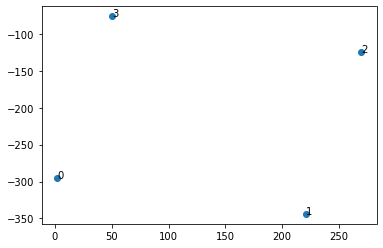

In [19]:
display_closestwords_tsnescatterplot(model, '2')

In [20]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3']
[[ 1.2341797  -0.08278949  1.0448277   0.65457493  4.12156    -0.71586055
   1.8818611  -2.0306568  -0.38252074  0.58733755 -1.3059788  -3.7312086
   0.41353038  2.222112    0.08293577  1.6663697   0.29283676 -4.164214
  -5.5874176  -1.6762513   2.787369   -0.748923    2.987644    2.5212312
  -0.540748    1.2589462  -0.9413058   0.572643    3.3864434   2.2953825 ]
 [-0.36324072 -0.15500511 -0.07331314 -1.5553591   2.6786392  -1.6228952
   0.3447591  -2.1890554   0.24665226  2.0626416   0.06700604 -3.3800023
   0.91131645  3.2815866  -0.7061339  -1.0349281  -1.0764356  -2.6465626
  -5.2483687  -1.6176956   3.1422384   0.73564285  4.07617     1.9399142
  -0.28866482  2.5168383  -1.2533495  -1.2611943   4.4827523   2.333523  ]
 [-1.5308394  -0.23557843  0.6323117  -0.44717443  2.6845946  -2.680645
   0.24058746  0.4587441   0.52590126  2.607705    1.124441   -1.3890132
   0.36042503  1.3938576  -0.66166496 -0.49602845  1.2810297  -1.3626235
  -4.8327975  -1.3845669   

In [21]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0  146.652634 -576.165283
1  373.328033 -149.180832
2  473.473877 -476.006134
3   46.506767 -249.339981


In [22]:
df.to_csv('doc2vec.csv')

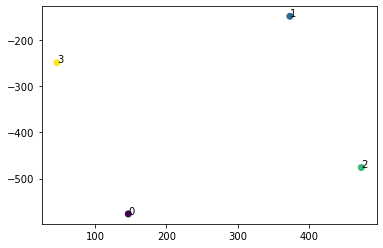

In [23]:
plt.scatter(df['x'], df['y'], c=range(4))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],i)
plt.show()

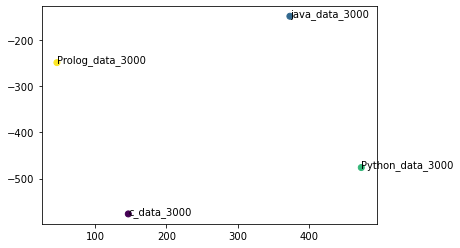

In [24]:
plt.scatter(df['x'], df['y'], c=range(4))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [25]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

          x         y
0 -2.652641  4.100060
1 -4.088907 -1.435412
2  0.340522 -3.640486
3  6.401027  0.975840


In [26]:
df_1.index

Index(['0', '1', '2', '3'], dtype='object')

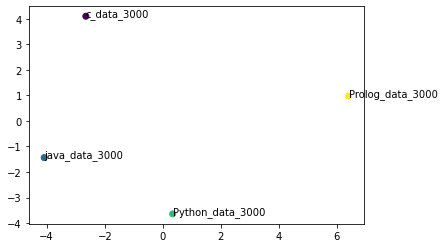

In [27]:
plt.scatter(df_1['x'], df_1['y'], c=range(4))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()